## Loading Sample data

In [2]:
# # Acquring GPU
# !nvidia-smi

# import os
# HOME = os.getcwd()
# print("HOME:", HOME)



# f"{HOME}/data"

# %cd {HOME}
# !mkdir {HOME}/data
# %cd {HOME}/data

# !git clone https://github.com/devasenan134/mfs.git
# %cp mfs/inputs/inputs ./inputs -R
# %rm -rf mfs
# %cd inputs

In [1]:
# For local machines
INPUTS = "../inputs/inputs/"

## Dependencies

In [2]:
!pip install supervision

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import supervision as sv

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Functions

In [3]:
def get_mask_imgs(img_path):
    mask_imgs = []
    org_img = ""
    for img in os.listdir(INPUTS+img_path):
        if img.split('.')[-1] == 'png':
            mask_imgs.append(img_path+"/"+img)
        else:
            org_img = img

    mask_imgs.append(img_path+"/"+org_img)
    return mask_imgs

In [4]:
def read_imgs(imgs):
    masks = []
    for img in imgs[:-1]:
        mask = cv2.imread(INPUTS+img, 0)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        plt.imshow(mask)    
        masks.append(mask)    
    return masks[::-1]

## Process

In [8]:
def peak_point_detection(mask):
    fig, axes = plt.subplots(1, 2, figsize =(10,10))

    blur_mask = cv2.blur(mask, (3, 3))
    ret, bin_mask = cv2.threshold(blur_mask, 50, 255, cv2.THRESH_BINARY)
    # cnts = cv2.findContours(bin_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    axes[0].imshow(mask)
    axes[1].imshow(bin_mask)

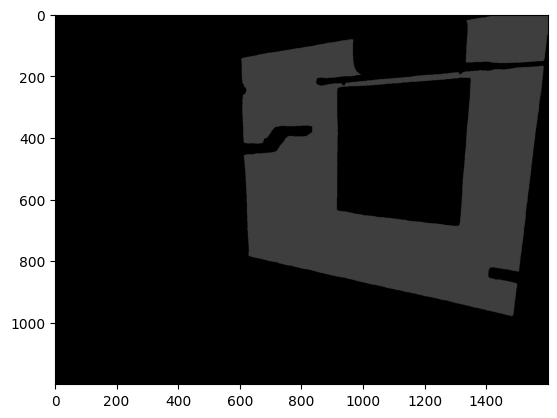

In [6]:
mask_imgs = get_mask_imgs('img2')
masks = read_imgs(mask_imgs)

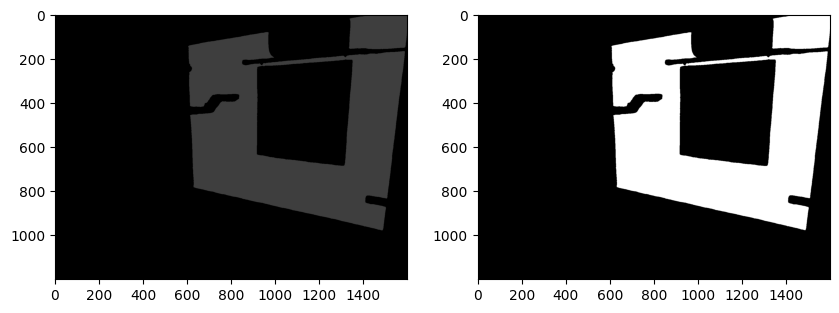

In [11]:
peak_point_detection(masks[0])